<a href="https://colab.research.google.com/github/Shubhra22/Tensorflow_tutorial_GDG/blob/master/FashionMnistTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

1.15.0


In [0]:
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 112kB/s 
     |████████████████████████████████| 3.8MB 48.1MB/s 
     |████████████████████████████████| 450kB 15.8MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


# Load Data:
For this Exercise we are going to use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This dataset contains about 70,000 grayscale images (28x28 pixels) in 10 categories. The first thing we need to do is to load the data and divide them into trainig and testing data. Tensorflow helps us to get some of the popular [datasets](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) through their Datasets API.

In [0]:
import tensorflow_datasets as tfds
dataset,info = tfds.load("fashion_mnist",as_supervised=True,with_info=True)

train_data,test_data = dataset['train'], dataset['test']

# how to manually select amount of train vs test
total_train_ex = info.splits["train"].num_examples
total_test_ex = info.splits["test"].num_examples

print(total_train_ex)
print(total_test_ex)

#with keras
# mnist = tf.keras.datasets.fashion_mnist
# (training_data, training_labels), (test_data, test_labels) = mnist.load_data()


60000
10000


# Preprocess Data:

In [0]:

def normalize(images, labels):
  images = tf.cast(images,tf.float32) # change the data type of the input data grabed from tf
  images /=255
  return images,labels

train_data= train_data.map(normalize)
test_data = test_data.map(normalize)

# Explore Data

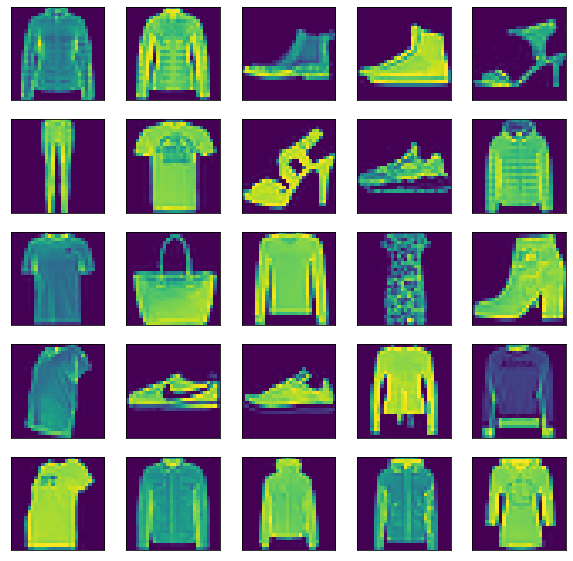

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
i = 1
for (image, label) in test_data.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    i += 1
plt.show()

# Build the model
Now we need to define our model. Lets start by creating a very simple neural network with one hidden layer and one output layer. All the hidden layers in a neural net helps to extract out features and the output layers gives us the output prediction. We have to follow these steps:
1. Flatten the image. This means we should make the 2d image of (28x28) pixel size to an 1D array of 784 pixels. This 784 pixel is going to be our input.
```
tf.keras.layers.Flatten()
```


2. We then pass the input nodes to the hidden/dense layers (For this example 128 nodes). Hidden layers takes the input nodes, will update their weights during learning (backpropegation) and outputs a value.

  An activation function is basically tells the neuron what to do, or how the output should be formed. There are a lot of different activation functions. Here we are going to use Relu. Learn more about different activation functions [here](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

  Relu gives us output that is bigger than zero.
  That is 

  **if X>0 then the function returns X
  otherwise 0** 
```
tf.keras.layers.Dense(128, activation=tf.nn.relu)
```

3. Finally we have the output layer with 10 neuron, for 10 different outputs. As you can notice we are using Softmax activation here. Softmax takes a set of values and returns probabilty of each of them, so the sum of the outputs turns into zero. Learn more about softmax in detail [here](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)




In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Run the model

In [0]:
# model.compile(optimizer= 'adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(train_data,epochs=5)
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_data.repeat().shuffle(total_train_ex).batch(BATCH_SIZE)
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(total_train_ex/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4682 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3573 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3231 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2998 - accuracy: 0.8904
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2809 - accuracy: 0.8957


# Model Evaluation

In [0]:
test_data = test_data.batch(BATCH_SIZE)
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(total_test_ex/BATCH_SIZE))

313/313 [==============================] - 3s 10ms/step - loss: 0.3461 - accuracy: 0.8753


In [0]:
for test_images, test_labels in test_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  classifications = model.predict(test_images)
#classifications[0]
#np.argmax(classifications[0])
print(test_labels[0])

4


# Practice

*   Change the model's dense layer or/and add more dense layers and see the accuracy
*   Try without normalizing pixel values
*    Try with different number of epochs.
*  Try to train a model with MNIST Hand written digits dataset

